# Anomaly Detection Techniques 

Anomaly detection has different techniques, here are most of them as I know: 

1- **Statistical Methods**:
   - 1 Z-score: Detect anomalies based on the number of standard deviations away from the mean.
   - 2 Modified Z-score: A variation of Z-score that is robust to outliers.
   - 3 Inter Quantile Range (IQR)
   - 4 Percentiles: Identify anomalies based on data points falling outside a specified percentile range.
   - 5 Grubbs' Test: Detect outliers in a univariate dataset based on extreme values.
   
2- **Density-Based Methods**:
   - 6 Local Outlier Factor (LOF): Measures the local density deviation of a data point with respect to its neighbors.
   - 7 DBSCAN (Density-Based Spatial Clustering of Applications with Noise): Clusters the data and labels points with low-density neighborhoods as outliers.
   

3- **Distance-Based Methods**:
   - 8 k-Nearest Neighbors (k-NN): Assign anomalies based on the distance to their k-nearest neighbors.
   - 9 Mahalanobis Distance: Measures the distance between a data point and the center of a distribution, accounting for the covariance between variables.


4- **Machine Learning-Based Methods**:
   - 10 One-Class SVM (Support Vector Machine): Trains a model on normal data and identifies deviations as anomalies.
   - 11 Autoencoders: Unsupervised neural network models that learn to reconstruct normal data and flag deviations as anomalies.
   - 12 Isolation Forest: Builds an ensemble of isolation trees to isolate anomalies.
   

5- **Time Series Anomaly Detection**:
   - 13 Moving Averages: Apply a moving average to smooth out noise in the time series. Anomalies are detected based on the deviation from the moving average.
   - 14 Seasonal Decomposition: Decompose a time series into its components (trend, seasonality, and residual). Anomalies can be detected in the residual component.
   - 15 Exponential Smoothing: Forecasts future values and identifies anomalies based on deviations from the forecasted values.
   - 16 ARIMA (AutoRegressive Integrated Moving Average): Fit an ARIMA model to the time series data and compare the residuals to detect anomalies.
   - 17 LSTM Autoencoders: Uses Long Short-Term Memory networks to detect anomalies in sequential data.
   

6 - **Multivariate Anomaly Detection**:
   - 18 Principal Component Analysis (PCA): Reduces dimensionality and identifies anomalies based on the residual errors.



# Create some random data with anomalies

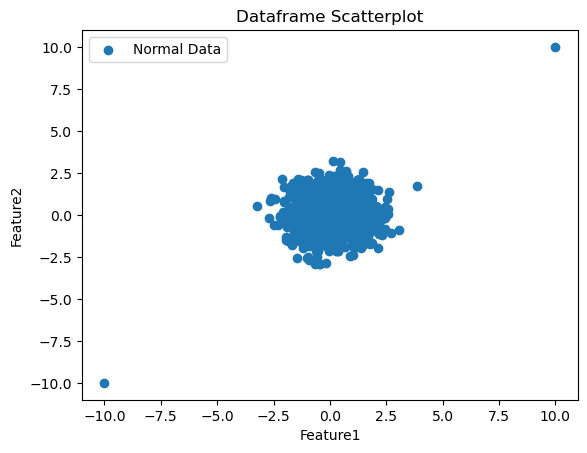

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000)
})

# Add some anomalies
df.loc[0] = [10, 10]
df.loc[1] = [-5 -5]

plt.scatter(df['Feature1'], df['Feature2'], label='Normal Data')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Dataframe Scatterplot')
plt.show()

# 1- Z-Score anomalies (Statistical Method)

The Z-score is a common method used for anomaly detection in data analytics. It helps identify data points that are significantly different from the mean of the dataset. 

the Z-score method for anomaly detection makes certain assumptions about the data. These assumptions are important to consider when applying the Z-score method to your data:

Normal Distribution Assumption: The Z-score assumes that the data follows a normal distribution (also known as a Gaussian distribution). If your data significantly deviates from a normal distribution, the Z-score method might not be appropriate, as it can lead to incorrect or unreliable results.

Independence Assumption: The Z-score assumes that the data points are independent of each other. This means that the presence of an anomaly in one data point does not affect the likelihood of an anomaly in another data point. In some cases, time series data or spatial data might violate this assumption.

Outlier Proportion Assumption: The Z-score method assumes that the proportion of outliers in the data is relatively small. If your dataset contains a substantial number of outliers, the Z-score method might not perform well.

Equal Variance Assumption: The Z-score method assumes that the variance of the data is equal across all levels. If the variance varies significantly across different groups or time periods, this assumption might not hold, and the Z-score method could lead to inaccurate results.

Symmetry Assumption: The Z-score method assumes that the data distribution is symmetric around the mean. If your data distribution is skewed or has a heavy tail, the Z-score might not provide accurate anomaly detection.

**Pros:**

1. **Simple Interpretation:** The Z-score is easy to understand and implement, making it accessible even to those without a deep statistical background.

2. **Effective for Normal Distributions:** When the data follows a normal distribution, the Z-score is an effective method for identifying outliers that deviate significantly from the mean.

3. **Standardization:** The Z-score standardizes data, allowing you to compare values across different scales and units.

4. **Quick Identification:** The Z-score quickly identifies data points that are far from the mean, which can be useful for preliminary anomaly detection.

**Cons:**

1. **Sensitive to Outliers:** The Z-score is sensitive to outliers, especially in smaller datasets. A single extreme value can significantly affect the mean and standard deviation, leading to false positives.

2. **Assumption of Normal Distribution:** The Z-score assumes that the data follows a normal distribution. If the data is not normally distributed, using the Z-score might result in inaccurate anomaly detection.

3. **Unstable for Small Samples:** In small sample sizes, the Z-score might not accurately reflect the underlying distribution and can lead to unreliable anomaly detection.

4. **Global Distribution Impact:** The Z-score considers the entire dataset's distribution, which can make it less suitable for detecting local anomalies within clusters or subsets of the data.

5. **Vulnerable to Skewness:** When the data is skewed, the Z-score might not effectively identify true anomalies since it's influenced by the skewness.

6. **Non-uniform Data:** The Z-score might not perform well when data comes from different distributions or when different clusters have varying densities.

In summary, the Z-score is a straightforward method for identifying anomalies in normally distributed data. However, its sensitivity to outliers and the assumption of normality can lead to issues, especially when these assumptions are not met. It's essential to understand the characteristics of your data and consider potential drawbacks before relying solely on the Z-score for anomaly detection.



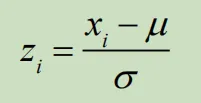

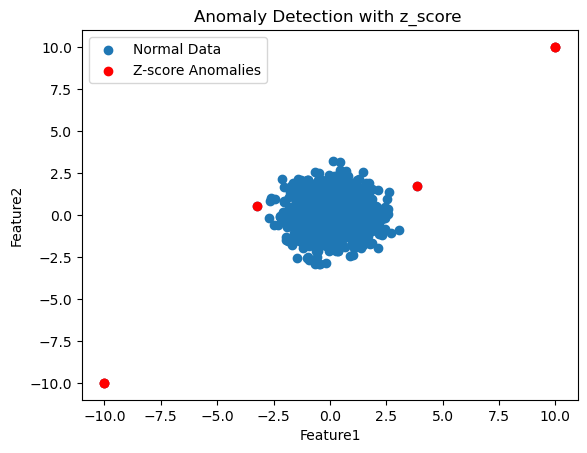

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000)
})

# Add some anomalies
df.loc[0] = [10, 10]
df.loc[1] = [-5 -5]


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


# Statistical Methods
# 1. Z-score
z_scores_anomalies = np.where((np.abs(scaled_data) > 3), True, False)

plt.scatter(df['Feature1'], df['Feature2'], label='Normal Data')
plt.scatter(df[z_scores_anomalies]['Feature1'], df[z_scores_anomalies]['Feature2'], color='red', label='Z-score Anomalies')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection with Z_score ')
plt.show()

# 2- Modified Z-score anomalies (Statistical Method)

The modified Z-score is a variation of the Z-score method that uses the median and the median absolute deviation (MAD) to identify anomalies. It's a robust method that's less sensitive to outliers compared to the traditional Z-score.

The modified Z-score is a variation of the standard Z-score method that uses the median and the median absolute deviation (MAD) to identify anomalies. It's more robust to outliers and deviations from normality. Here are the assumptions for using the modified Z-score method for anomaly detection:

No Assumption of Normal Distribution: Unlike the standard Z-score, the modified Z-score does not assume that the data follows a normal distribution. This makes it suitable for data that might deviate from normality.

Independence Assumption: Similar to the standard Z-score, the modified Z-score method assumes that data points are independent of each other.

Equal Variance Assumption: The modified Z-score is not as sensitive to variance differences across the dataset as the standard Z-score, but it's still preferable if the variance across the dataset is relatively consistent.

Outlier Proportion Assumption: The method is useful when dealing with datasets containing a proportion of outliers that might be relatively larger, as it's less influenced by extreme values.

Symmetry Assumption: While the modified Z-score is more robust to skewed distributions and outliers than the standard Z-score, it's still advisable to examine the distribution of your data and assess its symmetry.

The modified Z-score is a valuable method for anomaly detection, especially when dealing with skewed data distributions and a few extreme values. However, it's important to understand its limitations, such as the need for appropriate threshold selection and potential parameter sensitivity. Contextual understanding of your data is crucial when using the modified Z-score as a sole anomaly detection technique.

**Pros:**

1. **Robust to Outliers:** The modified Z-score is more robust to outliers compared to the standard Z-score. It uses the median and median absolute deviation (MAD), which are less affected by extreme values.

2. **No Assumption of Distribution:** Similar to the standard Z-score, the modified Z-score doesn't assume a specific data distribution, making it versatile for various types of data.

3. **Effective for Skewed Data:** The modified Z-score is particularly useful for skewed data distributions where the mean and standard deviation might be influenced by outliers.

4. **Simple Implementation:** Implementing the modified Z-score is relatively straightforward and requires calculating the median and MAD.

**Cons:**

1. **Threshold Selection:** Similar to other threshold-based methods, the performance of the modified Z-score heavily depends on the threshold chosen. Selecting an appropriate threshold requires domain knowledge and data understanding.

2. **Parameter Sensitivity:** While the modified Z-score is less sensitive to outliers, it's still influenced by the choice of parameters, including the threshold and possibly the tuning of the MAD.

3. **Insensitive to Data Variability:** The modified Z-score doesn't consider the variability of the data outside the median and MAD. It might not be effective when anomalies are not extreme values but still significantly different from the majority.

4. **Complex Anomalies:** For complex anomalies that are not just extreme values but exhibit unique patterns, the modified Z-score might not perform as well.

5. **Data Scaling:** Depending on the data, it might be necessary to scale or normalize the data before applying the modified Z-score.

6. **Contextual Information:** Like other univariate methods, the modified Z-score doesn't capture contextual information or relationships between variables.


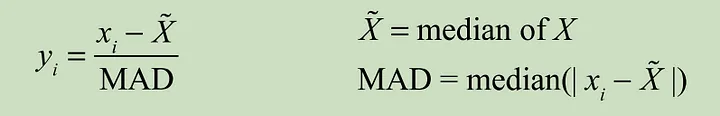

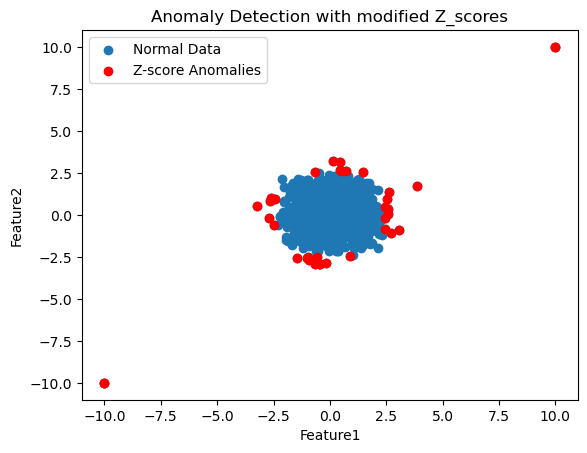

In [11]:
'''
Source: https://medium.com/analytics-vidhya/anomaly-detection-by-modified-z-score-f8ad6be62bac
Here we are going to make a slight modification and introduce a consistency correction k, 
which allows us to use MAD as a consistent estimate for the standard deviation. 
The value of k depends on the underlying distribution of the data. For simplicity, we will use k=1.4826.
'''

k=1.4826
threshold = 2.5
modified_z_scores = (df - df.median())/( k * ((df - df.median()).abs().median()) )
modified_z_scores_anomalies = np.where((modified_z_scores > threshold) | (modified_z_scores < -1*threshold), True, False)

plt.scatter(df['Feature1'], df['Feature2'], label='Normal Data')
plt.scatter(df[modified_z_scores_anomalies]['Feature1'], df[modified_z_scores_anomalies]['Feature2'], color='red', label='Z-score Anomalies')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection with modified Z_scores')
plt.show()

# 3- Interquanile Method 

Iqr: 1.3062752284633574
lower bound: -2.5827104776875607
upper bound: 2.642390436165869
anomalies:
       Feature1   Feature2
0    10.000000  10.000000
1   -10.000000 -10.000000
209   3.852731   1.749577
262  -3.241267   0.538756
323   2.092387   0.486502
478   3.078881  -0.887492
615   0.129221   3.193108
622   1.882024   0.919229
755   2.632382   1.373659
885   1.846707   0.280161


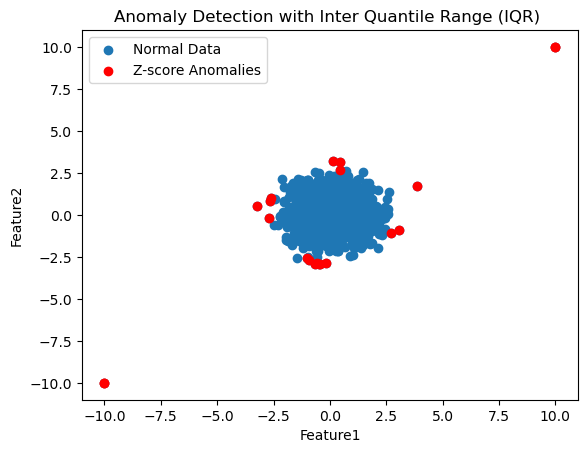

In [21]:
# Calculate the first and third quartiles
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)
IQR = Q3 - Q1
print ('Iqr:', IQR)
# Set bounds for anomalies
lower_bound = Q1 - 1.5 * IQR
print ("lower bound:", lower_bound)
upper_bound = Q3 + 1.5 * IQR
print ("upper bound:", upper_bound)
# Detect anomalies based on the interquartile range
iqm_anomalies= np.where ( (df < lower_bound)| (df > upper_bound), True, False )
print ("anomalies:\n" , anomalies)

plt.scatter(df['Feature1'], df['Feature2'], label='Normal Data')
plt.scatter(df[iqm_anomalies]['Feature1'], df[iqm_anomalies]['Feature2'], color='red', label='Z-score Anomalies')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection with Inter Quantile Range (IQR) ')
plt.show()

# 4- Percentile Anomalies - (Statistical Method)

Percentile-based anomaly detection involves identifying data points that fall below or above certain percentiles of the data distribution. While it's a straightforward method, it's important to consider its assumptions before applying it to your data:

1. **Assumption of Data Distribution Shape:** Percentile-based anomaly detection makes no assumption about the shape of the data distribution. This can be an advantage when dealing with non-normal or skewed data.

2. **Independence Assumption:** Like many other anomaly detection methods, percentile-based detection assumes that data points are independent of each other.

3. **Threshold Selection:** The effectiveness of percentile-based anomaly detection heavily depends on the percentile thresholds chosen. A lower percentile (e.g., 1st or 5th percentile) would identify values that are unusually low, while a higher percentile (e.g., 95th or 99th percentile) would identify values that are unusually high. The choice of percentiles should be driven by domain knowledge and the characteristics of your data.

4. **Outlier Proportion Assumption:** This method can handle situations where a small proportion of anomalies exists within the data. However, if anomalies make up a significant proportion of the data, percentile-based detection might not be very effective.

5. **Symmetry Assumption:** Percentile-based detection can work well with symmetric as well as asymmetric distributions. It's generally more robust against skewed data compared to methods like the Z-score.

6. **Data Scaling:** Depending on your data and use case, it might be necessary to scale or normalize the data before applying percentile-based anomaly detection. This ensures that percentiles are calculated in a meaningful way.

While percentile-based detection is relatively simple and doesn't assume specific data distributions, its performance depends on the characteristics of your data and the appropriate choice of percentiles. Always examine your data distribution and consider the potential impact of anomalies on your analysis before using this method.

Percentile-based anomaly detection is a simple and intuitive approach that can work well for certain types of data. It's particularly useful when domain knowledge informs the choice of percentiles. However, it's important to consider the limitations, such as the need for careful threshold selection and the inability to capture contextual information.

**Pros:**

1. **No Distribution Assumption:** Percentile-based detection doesn't assume a specific data distribution. It's robust to various distribution shapes, making it suitable for non-normal or skewed data.

2. **Simple and Intuitive:** The method is simple to understand and implement. It involves setting thresholds based on percentiles, which can be easily interpreted.

3. **Domain Knowledge:** Percentile-based detection can leverage domain knowledge. For example, if you know that values below a certain percentile are anomalous, you can use that information effectively.

4. **Effective for Skewed Data:** Percentile-based detection is effective for skewed data distributions where a standard deviation-based method like Z-score might struggle.

**Cons:**

1. **Threshold Selection:** The effectiveness of percentile-based detection heavily relies on threshold selection. Choosing appropriate percentiles requires domain knowledge and understanding of the data.

2. **Outlier Proportion:** The method's performance might be impacted if a significant proportion of the data is anomalous. It's most suitable when the proportion of anomalies is relatively low.

3. **Doesn't Capture Context:** Percentile-based detection doesn't capture the local context of the data. It doesn't consider relationships between data points, which could lead to false positives.

4. **Insensitive to Location:** Percentile-based methods don't take into account the location or trend of the data. Anomalies might not be detected if they are located within the same range as the majority of data.

5. **Scaling Considerations:** Depending on the distribution of the data, scaling or normalization might be necessary to calculate percentiles accurately.

6. **Limited against Multivariate Data:** Percentile-based detection is less straightforward for multivariate data. It requires defining percentiles for each variable, and anomalies might be missed when multiple variables interact.


![Percentiles](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Standard_deviation_diagram.svg/325px-Standard_deviation_diagram.svg.png)

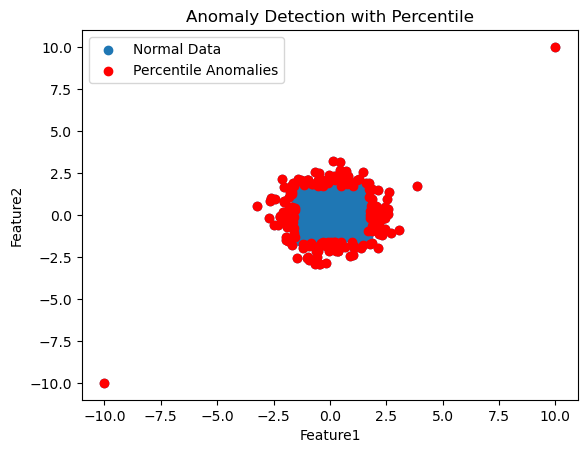

In [22]:
# Set the percentiles for anomaly detection (e.g., 95th percentile)
percentile5 = 5
percentile95 = 95

# Calculate the threshold values based on percentiles for each feature
thresholds = {
    'Feature1_5': np.percentile(df['Feature1'], percentile5),
    'Feature2_5': np.percentile(df['Feature2'], percentile5),
    'Feature1_95': np.percentile(df['Feature1'], percentile95),
    'Feature2_95': np.percentile(df['Feature2'], percentile95)
}

# Detect anomalies based on the threshold values
anomaly_indices = (df['Feature1'] > thresholds['Feature1_95']) | (df['Feature2'] > thresholds['Feature2_95']) | (df['Feature1'] < thresholds['Feature1_5']) | (df['Feature2'] < thresholds['Feature2_5'])
anomalies = df[anomaly_indices]


plt.scatter(df['Feature1'], df['Feature2'], label='Normal Data')
plt.scatter(anomalies['Feature1'], anomalies['Feature2'], color='red', label='Percentile Anomalies')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection with Percentile')
plt.show()


# 5- Grubb's test

Grubbs' test is a statistical method used for outlier detection in a univariate dataset. It identifies potential outliers by comparing the value of a data point to the mean and standard deviation of the dataset. The test calculates a statistic called the Grubbs' score or G-score, which quantifies how far away the data point is from the mean in terms of standard deviations.

The Grubbs' score for a data point is calculated using the following formula:

$G = \dfrac{|x - \bar{x}|}{s}$

Where:
- ( G ) is the Grubbs' score.
- ( x ) is the value of the data point.
- $\bar{x}$ is the mean of the dataset.
- ( s ) is the sample standard deviation of the dataset.

The Grubbs' score measures how many standard deviations away from the mean the data point is. The larger the G-score, the farther the data point is from the mean, indicating a higher likelihood of being an outlier.

To determine whether a data point is an outlier, you compare its G-score to a critical value from the Grubbs' distribution table. If the G-score exceeds the critical value, the data point is considered an outlier.

The test can be performed iteratively, where the identified outliers are removed from the dataset, and the test is applied again until no more outliers are detected.

Grubbs' test assumes that the data follows a normal distribution, and it is sensitive to the number of data points in the dataset. It's important to note that while Grubbs' test is useful for identifying individual outliers in univariate datasets, other methods might be more appropriate for multivariate or complex datasets.

Grubbs' test is a statistical method commonly used for detecting outliers in univariate datasets. Like any technique, it comes with its own set of advantages and limitations. Here are the pros and cons of using Grubbs' test for outlier detection

Grubbs' test is a useful and simple method for identifying extreme outliers in univariate datasets, especially when the data is normally distributed. However, its effectiveness can be limited by deviations from normality, small sample sizes, and the presence of less extreme but still significant anomalies. It's a valuable tool in the data analyst's toolkit, but its assumptions and limitations should be considered carefully.

**Pros:**

1. **Simple and Quick:** Grubbs' test is straightforward to understand and implement, making it a quick initial step for identifying outliers.

2. **Univariate Focus:** The test is designed for univariate datasets, making it suitable when analyzing a single variable's distribution.

3. **Quantitative Measure:** Grubbs' test provides a quantitative score (G-score) that indicates the degree of deviation from the mean in terms of standard deviations.

4. **Identifies Extreme Values:** Grubbs' test is effective at identifying individual extreme values that are far from the mean.

5. **Iterative Approach:** The test can be applied iteratively, removing outliers and retesting, which helps refine outlier detection.

6. **Assumes Normality:** Grubbs' test is designed for normally distributed data. If the data follows a normal distribution, the test is quite powerful.

**Cons:**

1. **Assumption of Normality:** Grubbs' test assumes that the data is normally distributed. It can lead to inaccurate results if the data distribution significantly deviates from normality.

2. **Univariate Limitation:** Grubbs' test is limited to analyzing a single variable. It doesn't account for relationships between multiple variables.

3. **Sensitivity to Sample Size:** The test's effectiveness can be influenced by the number of data points. It might not work well with small sample sizes.

4. **Not Robust:** Grubbs' test is sensitive to outliers themselves. An extreme outlier can affect the mean and standard deviation, leading to false positives.

5. **Limited to Extreme Outliers:** Grubbs' test is designed to detect individual extreme values. It might miss anomalies that are not extreme but still significant.

6. **Outlier Definition Matters:** The critical values for the G-score depend on the number of data points and the significance level chosen. Different definitions of "outlier" might yield different results.

7. **Multiple Testing Issues:** If used on large datasets or with multiple variables, Grubbs' test may increase the risk of false positives due to multiple testing.

8. **Sensitive to Distribution Shape:** Grubbs' test can be sensitive to the distribution's shape, particularly if it has heavy tails or other deviations from normality.

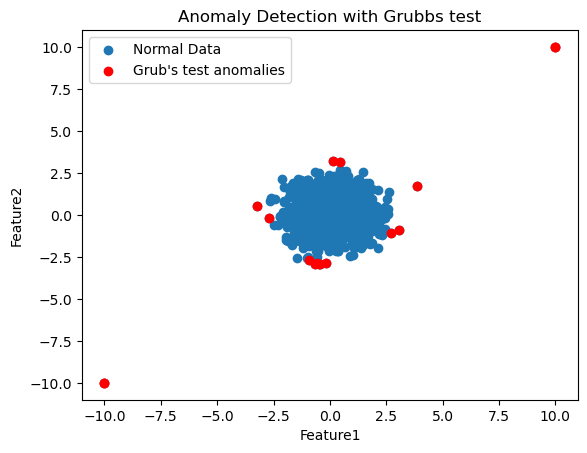

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Anomaly detection using Grubbs' test
def grubb_anomaly_detection(data, alpha=2.5):
    anomalies = []
    for col in data.columns:
        z_scores = np.abs(zscore(data[col]))
        mask = z_scores > alpha
        anomalies.extend(np.where(mask)[0])
    return anomalies

# Set the significance level (alpha) for the test
alpha = 2.5

# Detect anomalies using Grubbs' test
anomalies = grubb_anomaly_detection(df, alpha=alpha)

# Plot anomalies against the original dataset
plt.scatter(df['Feature1'], df['Feature2'], label='Normal Data')
plt.scatter(df.iloc[anomalies]['Feature1'], df.iloc[anomalies]['Feature2'], color='red', label='Grub\'s test anomalies')
plt.legend()
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection with Grubbs test')
plt.show()


# 6- Local Outlier Factor (Density-Based Methods)

Is an anomaly detection algorithm that quantifies the local density deviation of a data point with respect to its neighbors. It identifies anomalies by measuring how isolated a data point is in its local neighborhood compared to the rest of the dataset. LOF is particularly effective at detecting anomalies in datasets with non-uniform density or clusters of different densities.

The Local Outlier Factor (LOF) is an unsupervised anomaly detection algorithm used to identify outliers in a dataset. It focuses on the local density deviation of a data point with respect to its neighbors. LOF is particularly effective in identifying anomalies in datasets with varying densities or clusters.

Here's how the Local Outlier Factor algorithm works:

1. **Calculating Local Reachability Density (LRD):**
   - For each data point, LOF computes a local reachability density (LRD), which measures the density of the data point relative to its neighbors.
   - It does this by calculating the average distance from the data point to its k-nearest neighbors (k-distance).

2. **Calculating Local Outlier Factor (LOF):**
   - LOF then calculates the LOF for each data point, which quantifies the local outlier-ness of the point.
   - The LOF of a data point is the average ratio of its LRD to that of its k-nearest neighbors.
   - A high LOF value indicates that the data point is in a lower-density region compared to its neighbors, which suggests it might be an outlier.

3. **Identifying Anomalies:**
   - Anomalies are identified based on the LOF values. Data points with LOF values significantly greater than 1 are considered outliers.
   - LOF values less than 1 suggest that the data point is in a region of higher density compared to its neighbors.

4. **Tuning Parameters:**
   - The parameter `k`, the number of nearest neighbors to consider, needs to be set appropriately. It should be chosen based on the characteristics of the dataset.
   

5. **Scalability:**
   - LOF can become computationally expensive for large datasets since it involves calculating distances between data points.

LOF is advantageous in cases where clusters have varying densities and shapes. It's also effective at handling noise and can work with data in higher-dimensional spaces. However, it does have limitations, such as sensitivity to parameter settings and computational overhead for large datasets.

When using LOF, it's important to experiment with different `k` values and understand the characteristics of your data. Keep in mind that LOF might not perform well in cases where anomalies are globally spread out or when clusters have overlapping densities.

The Local Outlier Factor (LOF) algorithm has its advantages and disadvantages, which should be considered when choosing it for anomaly detection:

**Pros:**

1. **Handles Varying Densities:** LOF is effective at identifying anomalies in datasets with varying densities or clusters, where traditional methods like the Z-score may struggle.

2. **Robust to Noise:** LOF is relatively robust to noise and can handle data with irregularities or outliers well.

3. **No Assumption of Data Distribution:** LOF does not assume a specific data distribution, making it suitable for various types of data.

4. **Local Context:** LOF is designed to assess the anomaly status of a data point in relation to its local neighborhood, making it sensitive to local patterns and clusters.

5. **Works in High Dimensions:** LOF can handle datasets with a high number of dimensions, making it suitable for anomaly detection in complex data spaces.

**Cons:**

1. **Parameter Sensitivity:** LOF's performance can be sensitive to the choice of the `k` parameter (number of nearest neighbors) and the scaling of the data. Selecting an appropriate `k` is crucial, and different `k` values can yield different results.

2. **Computational Complexity:** Calculating LOF requires pairwise distance calculations between data points, which can be computationally expensive for large datasets. Approximation techniques may be necessary for scalability.

3. **Overlapping Densities:** LOF may struggle when clusters have overlapping densities, leading to inaccuracies in anomaly detection.

4. **Global Outliers:** LOF might not perform well in scenarios where anomalies are spread globally throughout the dataset, as it primarily focuses on local context.

5. **Imbalanced Data:** LOF assumes that anomalies are fewer in number compared to normal instances. If the dataset is heavily imbalanced, LOF's performance might be affected.

6. **Boundary Cases:** LOF can sometimes struggle with detecting anomalies near the boundaries of clusters.

In summary, LOF is a powerful algorithm for anomaly detection, especially when dealing with datasets containing varying density clusters and local patterns. However, it requires careful parameter tuning and should be used in conjunction with domain knowledge and exploratory data analysis to achieve optimal results.

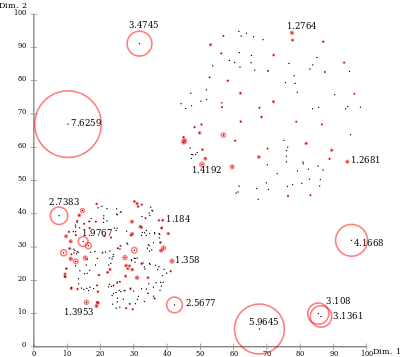

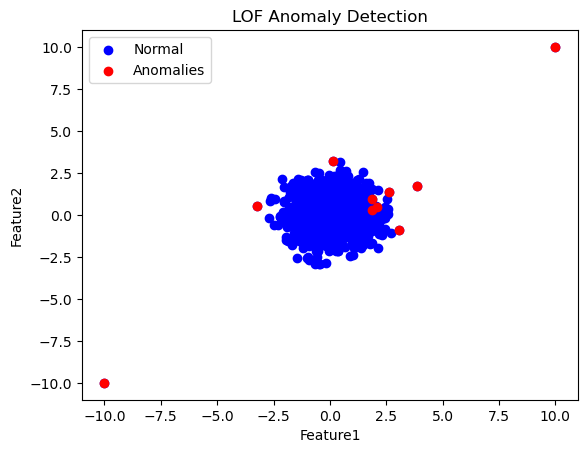

In [15]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Convert the DataFrame to a NumPy array
X = df.values

# Create LOF model
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.01)

# Fit the model and predict anomalies
predictions = lof.fit_predict(X)

# Get anomaly scores (negative LOF values)
anomaly_scores = -lof.negative_outlier_factor_

# Identify anomalies
anomalies = df[predictions == -1]

plt.scatter(df['Feature1'], df['Feature2'], color='blue', label='Normal')
plt.scatter(anomalies['Feature1'], anomalies['Feature2'], color='red', label='Anomalies')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('LOF Anomaly Detection')
plt.legend()
plt.show()

# 7- Isolation Forest - Machine Learning-Based Methods

The Isolation Forest algorithm is an unsupervised machine learning technique used for anomaly detection. It is particularly efficient in detecting anomalies in high-dimensional datasets. The algorithm is based on the idea that anomalies are easier to isolate compared to normal data points. It builds an ensemble of isolation trees, which are essentially binary trees that partition the data space into smaller regions.

The Isolation Forest is an effective and efficient anomaly detection algorithm that works by isolating anomalies in a dataset. It's particularly useful for high-dimensional datasets and can handle both global and local anomalies. The basic idea behind the Isolation Forest is to separate anomalies (or outliers) faster than normal data points.

How the Isolation Forest algorithm works:

1. **Random Partitioning:**
   - The algorithm randomly selects a feature and then randomly selects a split value within the range of that feature.
   - This process creates a binary tree-like structure where each node represents a feature and a split value.

2. **Recursive Sub-sampling:**
   - The data points are recursively partitioned into different branches of the tree. Points that reach the final node in fewer splits are more likely to be anomalies.
   - The number of splits it takes to isolate a point can be considered as a measure of its "anomalousness."

3. **Scoring Anomalies:**
   - The average path length of a data point in the forest is calculated as it traverses down the tree.
   - Anomalies will typically have shorter average path lengths because they are isolated faster. Normal data points will require more splits to isolate.

4. **Anomaly Detection:**
   - The algorithm assigns an anomaly score to each data point based on its average path length.
   - Data points with shorter average path lengths (lower values) are considered anomalies.

**Pros of Isolation Forest:**

1. **Effective for High Dimensions:** Isolation Forest works well for high-dimensional datasets where traditional distance-based methods struggle.

2. **Efficiency:** The algorithm's efficiency makes it suitable for large datasets. It doesn't require a lot of memory and can be parallelized.

3. **Handles Clusters:** Isolation Forest can identify anomalies within clusters, making it suitable for datasets with different density regions.

4. **Scalability:** Isolation Forest scales well to larger datasets without significant degradation in performance.

**Cons of Isolation Forest:**

1. **Parameter Sensitivity:** The algorithm's performance can depend on the number of trees in the forest and other hyperparameters.

2. **Randomness:** The randomness in selecting features and split values can lead to variability in results.

3. **Global Outliers:** Isolation Forest might not be the best choice for detecting global outliers that aren't isolated quickly.

4. **Data Scaling:** Isolation Forest doesn't inherently handle data scaling. Scaling can impact results, especially in high-dimensional spaces.

In summary, the Isolation Forest algorithm is a powerful and efficient method for anomaly detection, especially in high-dimensional datasets. Its ability to handle clusters and local anomalies makes it versatile. However, like any algorithm, it requires parameter tuning and consideration of its strengths and limitations based on your specific data and use case.

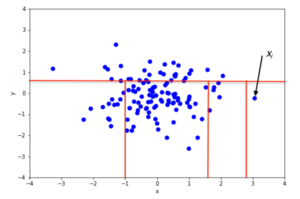

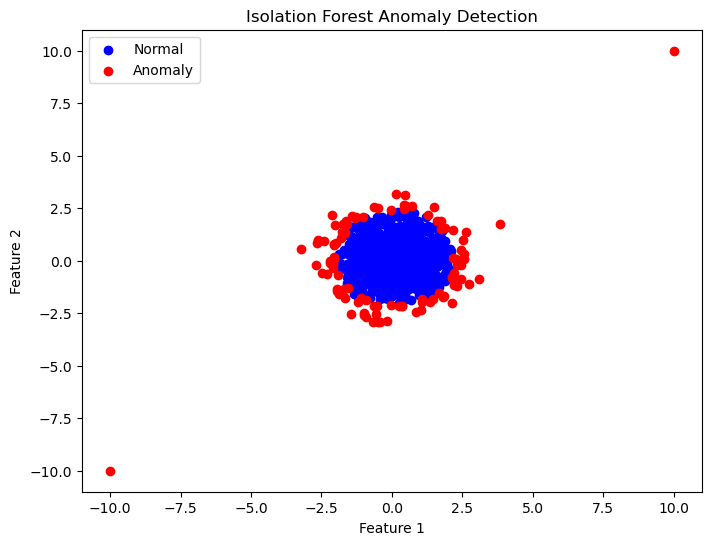

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


# Convert the DataFrame to a NumPy array
X = df.values

# Create Isolation Forest model
clf = IsolationForest(contamination=0.1, random_state=42)

# Fit the model and predict anomalies
predictions = clf.fit_predict(X)

# Identify anomalies
anomalies = X[predictions == -1]
normal_points = X[predictions == 1]

# Plot the data and anomalies
plt.figure(figsize=(8, 6))
plt.scatter(normal_points[:, 0], normal_points[:, 1], color='blue', label='Normal')
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label='Anomaly')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Isolation Forest Anomaly Detection')
plt.legend()
plt.show()


# 8- DBScan - Density Based Method

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is primarily a clustering algorithm rather than an anomaly detection method. However, it can be adapted for anomaly detection by considering points that are not assigned to any cluster as anomalies. This is because DBSCAN focuses on identifying dense regions of data and considering points in sparser regions as noise or outliers. 

In summary, while DBSCAN is primarily designed for clustering, it can be adapted for anomaly detection by treating noise points as anomalies. It's most effective for local anomaly detection within dense clusters, but parameter tuning and consideration of data characteristics are important to achieve meaningful results.

1. **Density-Based Clustering:**
   - DBSCAN starts by selecting a random point from the dataset.
   - It then identifies all points within a specified distance (epsilon) from the starting point. These points are considered neighbors.

2. **Core Points and Density Reachability:**
   - If the number of neighbors around a point is greater than a specified minimum number of points (min_samples), it's considered a "core point."
   - For each core point, DBSCAN identifies all points that are directly or indirectly reachable within epsilon distance. These form a cluster.

3. **Noise Points:**
   - Points that are not core points or reachable from any core point are considered noise points or outliers.

4. **Anomaly Detection using Noise:**
   - In the context of anomaly detection, you can consider the noise points identified by DBSCAN as anomalies.
   - These are data points that don't fit well within any dense cluster.

**Pros of Using DBSCAN for Anomaly Detection:**

1. **Cluster-Based Approach:** DBSCAN can be effective for identifying anomalies that fall outside dense clusters, making it useful for local anomaly detection.

2. **Adaptive to Density:** DBSCAN adapts well to varying data densities, making it suitable for datasets with non-uniform density regions.

3. **No Assumption of Data Distribution:** DBSCAN doesn't assume a specific data distribution.

**Cons of Using DBSCAN for Anomaly Detection:**

1. **Threshold Selection:** Setting appropriate values for epsilon and min_samples is essential for effective anomaly detection. Poor choices can lead to missing anomalies or classifying normal points as anomalies.

2. **Limited for Global Anomalies:** DBSCAN may not be as effective in identifying global anomalies that aren't easily separable from normal data.

3. **Sensitive to Parameters:** Performance can be sensitive to parameter choices, and finding optimal values can be challenging.

4. **Scaling and Noise:** DBSCAN may struggle with high-dimensional data and noisy data. Noise points can be mistakenly classified as anomalies.

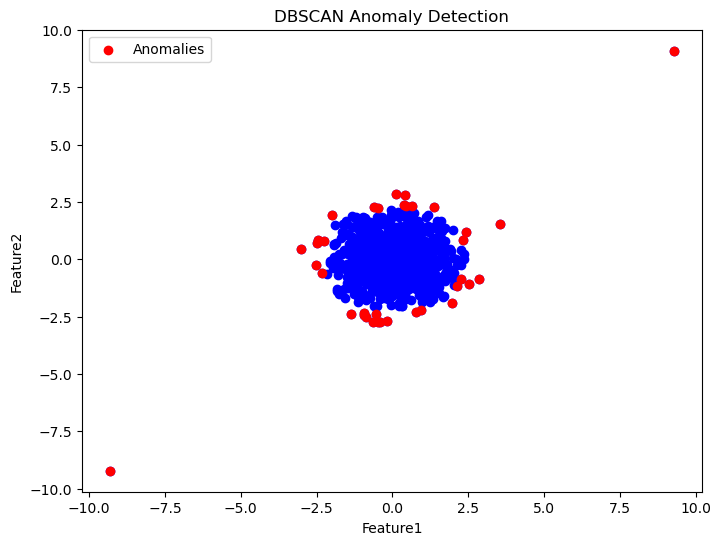

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Create DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=20)

# Fit the model and predict clusters
cluster_labels = dbscan.fit_predict(scaled_data)

# Extract anomalies (cluster label -1)
anomalies = scaled_data[cluster_labels == -1]

# Plot the data points and anomalies
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c='blue')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('DBSCAN Anomaly Detection')
plt.legend()
plt.show()

# 9- kNN - Distance-Based Methods

k-Nearest Neighbors (kNN) is a versatile algorithm that can be used for anomaly detection by considering the similarity of data points to their neighbors. The idea is that anomalies will have fewer nearby neighbors that are similar to them compared to normal data points. Here's how you can use kNN for anomaly detection:

1. **Select k:**
   - Choose a value for k, which is the number of nearest neighbors to consider. The appropriate value of k depends on your data and should be chosen carefully. A smaller k might be sensitive to noise, while a larger k might miss local anomalies.

2. **Calculate Distances:**
   - Calculate the distance between the data point you're interested in and all other data points in your dataset.

3. **Find k Nearest Neighbors:**
   - Identify the k data points with the shortest distances to the target data point.

4. **Calculate Average Distance:**
   - Calculate the average distance of the k nearest neighbors from the target data point.

5. **Anomaly Detection:**
   - If the average distance of the k nearest neighbors is significantly larger than the average distances for most other data points, the target data point is considered an anomaly.

**Pros of Using kNN for Anomaly Detection:**

1. **Adaptive to Data:** kNN is adaptive to different types of data and doesn't assume a specific distribution.

2. **Local Anomaly Detection:** kNN is particularly effective for detecting local anomalies within dense regions.

3. **Flexibility:** kNN can handle data with various shapes, densities, and dimensions.

4. **No Assumption of Data Distribution:** kNN doesn't assume a specific data distribution, making it applicable to different data types.

**Cons of Using kNN for Anomaly Detection:**

1. **Parameter Sensitivity:** The choice of k significantly affects the results. An inappropriate value of k can lead to false positives or negatives.

2. **Distance Metric:** The choice of distance metric is crucial. Depending on the data, the Euclidean distance might not be the best metric. Scaling and normalization are important.

3. **Curse of Dimensionality:** kNN's performance can degrade in high-dimensional spaces due to the curse of dimensionality. Distance-based methods suffer when the number of dimensions is large.

4. **Global Anomalies:** kNN might not be as effective for detecting global anomalies that are significantly different from all data points.

5. **Computational Complexity:** kNN requires calculating distances for all data points, which can be computationally expensive for large datasets.

In summary, kNN is a flexible and adaptive method for anomaly detection, particularly suitable for local anomaly detection within dense regions. However, careful parameter tuning and attention to distance metrics are essential for meaningful results.

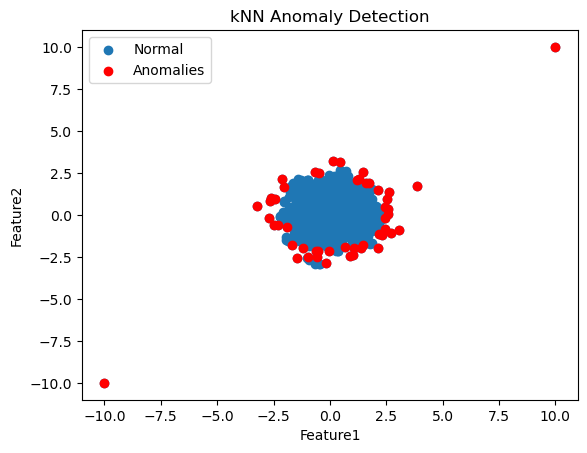

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


# Create kNN model
n_neighbors = 4
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(df)

# Calculate distances and indices of k-nearest neighbors
distances, indices = knn.kneighbors()

# Calculate the average distance to k-nearest neighbors for each point
avg_distances = np.mean(distances, axis=1)

# Set a threshold for anomaly detection (you can adjust this as needed)
distance_threshold = np.percentile(avg_distances, 95)

# Identify anomalies
anomalies = df[avg_distances > distance_threshold]

# Plot the dataset and anomalies
plt.scatter(df['Feature1'], df['Feature2'], label='Normal')
plt.scatter(anomalies['Feature1'], anomalies['Feature2'], color='red', label='Anomalies')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('kNN Anomaly Detection')
plt.legend()
plt.show()


# 10- Mahalanobis Distance - Distance Based Method

Mahalanobis Distance is a measure that quantifies the distance between a data point and a distribution in a multivariate space, taking into account the correlations between variables. It's often used for anomaly detection, especially when dealing with data that has correlated features. Here's how you can use Mahalanobis Distance for anomaly detection:

1. **Calculate Covariance Matrix:**
   - Calculate the covariance matrix of your dataset. This matrix represents the relationships between variables and indicates how much they vary together.

2. **Calculate Mean Vector:**
   - Calculate the mean vector of your dataset. This vector represents the average values of each variable.

3. **Calculate Inverse Covariance Matrix:**
   - Calculate the inverse of the covariance matrix. This is needed for computing Mahalanobis Distance.

4. **Calculate Mahalanobis Distance:**
   - For each data point, calculate the Mahalanobis Distance using the formula:
     ```
     MD = sqrt((x - μ)^T * Σ^-1 * (x - μ))
     ```
     where:
     - `x` is the data point.
     - `μ` is the mean vector.
     - `Σ^-1` is the inverse covariance matrix.

5. **Threshold and Anomaly Detection:**
   - Set a threshold for the Mahalanobis Distance. Data points with distances above this threshold are considered anomalies.

**Pros of Using Mahalanobis Distance for Anomaly Detection:**

1. **Accounts for Correlation:** Mahalanobis Distance takes into account the correlations between variables, which is particularly useful for detecting anomalies in datasets with correlated features.

2. **Multivariate Analysis:** Mahalanobis Distance is suitable for detecting anomalies in multivariate data.

3. **No Assumption of Normal Distribution:** Mahalanobis Distance doesn't assume a specific data distribution.

4. **Effective for Elliptical Clusters:** Mahalanobis Distance is effective for detecting anomalies in elliptically shaped clusters.

**Cons of Using Mahalanobis Distance for Anomaly Detection:**

1. **Sensitivity to Multivariate Outliers:** Mahalanobis Distance can be sensitive to multivariate outliers that can strongly influence the covariance matrix.

2. **Parameter Selection:** The threshold for Mahalanobis Distance needs to be chosen carefully, which can be challenging.

3. **Computationally Intensive:** Calculating the inverse covariance matrix and Mahalanobis Distance can be computationally intensive for large datasets.

4. **Scaling Consideration:** Scaling and normalization might be necessary for the variables, as Mahalanobis Distance is sensitive to the scale of the data.

In summary, Mahalanobis Distance is a valuable tool for anomaly detection in multivariate data, especially when dealing with correlated features. However, parameter selection and careful consideration of the data's characteristics are important for meaningful results.

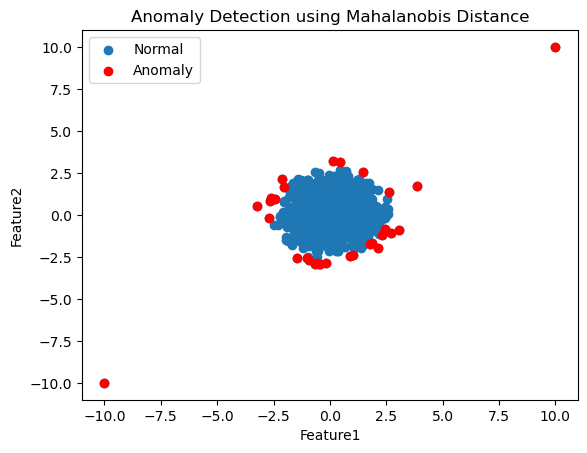

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import mahalanobis

# Calculate the mean and covariance matrix of the data
mean_vector = df.mean()
cov_matrix = df.cov()

# Calculate the inverse of the covariance matrix
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Calculate the Mahalanobis Distance for each data point
mahalanobis_distances = []
for _, row in df.iterrows():
    mahalanobis_distances.append(mahalanobis(row, mean_vector, inv_cov_matrix))

mahalanobis_distances = np.array(mahalanobis_distances)

# Set a Mahalanobis Distance threshold for anomaly detection
mahalanobis_distance_threshold = 2.5

# Find indices of anomalies
anomaly_indices = np.where(mahalanobis_distances > mahalanobis_distance_threshold)[0]

# Plot the dataset and highlight anomalies
plt.scatter(df['Feature1'], df['Feature2'], label='Normal')
plt.scatter(df.iloc[anomaly_indices]['Feature1'], df.iloc[anomaly_indices]['Feature2'], color='red', label='Anomaly')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Anomaly Detection using Mahalanobis Distance')
plt.legend()
plt.show()


# 11- One-Class SVM - Machine Learning-Based Methods

A One-Class SVM (Support Vector Machine) is a machine learning algorithm used for anomaly detection. Unlike traditional SVMs that are used for classification tasks, a One-Class SVM is designed to learn and identify anomalies or outliers in a dataset without relying on labeled training data. It works on the principle of capturing the distribution of normal data and then identifying instances that deviate significantly from this distribution as anomalies.

One-Class SVM is similar, but instead of using a hyperplane to separate two classes of instances, it uses a hypersphere to encompass all of the instances. Now think of the "margin" as referring to the outside of the hypersphere -- so by "the largest possible margin", we mean "the smallest possible hypersphere".

In summary, One-Class SVM is a powerful technique for anomaly detection, particularly when dealing with unbalanced data and high-dimensional spaces. However, careful hyperparameter tuning and consideration of data characteristics are important for obtaining accurate results.

One-Class Support Vector Machine (One-Class SVM) is a popular algorithm for anomaly detection. It's designed to find a hyperplane that separates the majority of data from the region containing anomalies. Here's how you can use One-Class SVM for anomaly detection:

1. **Training the Model:**
   - One-Class SVM is trained on normal data only, assuming that anomalies are a minority in the dataset.
   - You provide the algorithm with your normal data and specify a kernel (e.g., Gaussian or Radial Basis Function).

2. **Finding the Separating Hyperplane:**
   - One-Class SVM's goal is to find a hyperplane that encloses the normal data points while excluding anomalies.

3. **Anomaly Detection:**
   - During testing, data points that fall on the side of the hyperplane with fewer normal data points are classified as anomalies.

**Pros of Using One-Class SVM for Anomaly Detection:**

1. **Flexibility:** One-Class SVM can handle data in high-dimensional spaces and is suitable for various types of data distributions.

2. **Handles Unbalanced Data:** One-Class SVM is effective for datasets where anomalies are a small proportion of the data.

3. **Non-linear Separation:** One-Class SVM can capture non-linear boundaries between normal and anomalous data points.

4. **Robust to Noise:** One-Class SVM is robust to noise in the training data, as it focuses on finding the overall pattern of normal data.

**Cons of Using One-Class SVM for Anomaly Detection:**

1. **Hyperparameter Tuning:** Choosing the appropriate kernel and tuning hyperparameters can be challenging and requires cross-validation.

2. **Scalability:** One-Class SVM's performance can degrade on large datasets due to its computational complexity.

3. **Global Anomalies:** One-Class SVM might not be as effective at detecting global anomalies that don't have a clear boundary with normal data.

4. **Sensitive to Outliers:** One-Class SVM can be sensitive to the presence of outliers in the training data.

5. **Data Scaling:** Scaling and normalization might be necessary, especially when using non-linear kernels.

6. **Interpretability:** The hyperplane might not be interpretable, making it difficult to understand the characteristics of the anomalies.

![image.png](https://www.mdpi.com/applsci/applsci-13-01734/article_deploy/html/images/applsci-13-01734-g001.png)

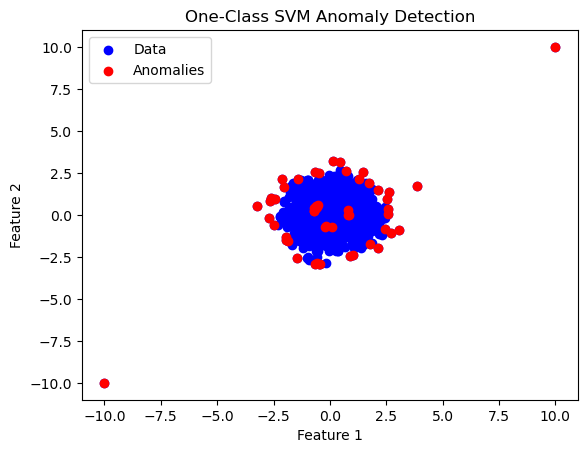

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

data = df.values

# Create One-Class SVM model
nu_value = 0.05  # Proportion of outliers
ocsvm = OneClassSVM(kernel='rbf', nu=nu_value)

# Fit the model
ocsvm.fit(data)

# Predict inliers and outliers
predictions = ocsvm.predict(data)
inliers = data[predictions == 1]
outliers = data[predictions == -1]

# Plot the data and anomalies
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Data')
plt.scatter(outliers[:, 0], outliers[:, 1], color='red', label='Anomalies')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('One-Class SVM Anomaly Detection')
plt.legend()
plt.show()


# 12- Autoencoder - Machine Learning technique

Using an Autoencoder for anomaly detection involves training an Autoencoder neural network to learn the patterns present in normal data. Anomalies are then detected by observing how well the Autoencoder can reconstruct new data samples. When the Autoencoder struggles to reconstruct a sample accurately, it suggests the presence of an anomaly.

In summary, autoencoders can be effective for anomaly detection, especially in cases where the data has high dimensionality and complex patterns. However, proper tuning and evaluation are necessary, and the architecture's performance should be assessed based on the specific dataset and anomaly characteristics.

Autoencoders are a type of neural network architecture commonly used for dimensionality reduction and feature learning. They can also be adapted for anomaly detection, particularly when dealing with high-dimensional data. Here's how you can use autoencoders for anomaly detection:

1. **Architecture Setup:**
   - An autoencoder consists of an encoder and a decoder. The encoder compresses the input data into a lower-dimensional latent space representation, while the decoder reconstructs the original input from this representation.

2. **Training on Normal Data:**
   - Train the autoencoder using only normal data. The network learns to reconstruct normal data patterns.

3. **Reconstruction Loss:**
   - During training, the reconstruction loss is calculated as the difference between the input and the output of the autoencoder. This loss captures the discrepancies between the original data and the reconstructed data.

4. **Anomaly Detection:**
   - After training, feed both normal and anomalous data through the autoencoder.
   - Calculate the reconstruction loss for each data point.
   - Data points with high reconstruction loss are likely anomalies, as they deviate significantly from the patterns learned during training.

**Pros of Using Autoencoders for Anomaly Detection:**

1. **Unsupervised Learning:** Autoencoders can be trained in an unsupervised manner, requiring only normal data for training.

2. **High-Dimensional Data:** Autoencoders can handle high-dimensional data and can capture complex relationships within the data.

3. **Non-linear Patterns:** Autoencoders can capture non-linear patterns, making them suitable for anomaly detection in various types of data.

4. **Feature Extraction:** Autoencoders inherently learn meaningful features from the data, which can aid in identifying anomalies.

**Cons of Using Autoencoders for Anomaly Detection:**

1. **False Positives:** Autoencoders might generate false positives if anomalies resemble certain normal data patterns.

2. **Hyperparameter Tuning:** Hyperparameter tuning, such as the architecture size, learning rate, and number of training epochs, is required for optimal performance.

3. **Limited Interpretability:** The detection process might lack interpretability, making it challenging to understand why a certain instance is flagged as an anomaly.

4. **Training Data Quality:** The performance of autoencoders heavily depends on the quality of the training data. Noisy or biased data can impact results.

5. **Class Imbalance:** Autoencoders can struggle with class imbalance, as they learn primarily from normal data.

![autoencoder](https://miro.medium.com/v2/resize:fit:777/1*ce89U6z-MhgGRln9VRAMxQ.png)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

32/32 [==============================] - 0s 1ms/step


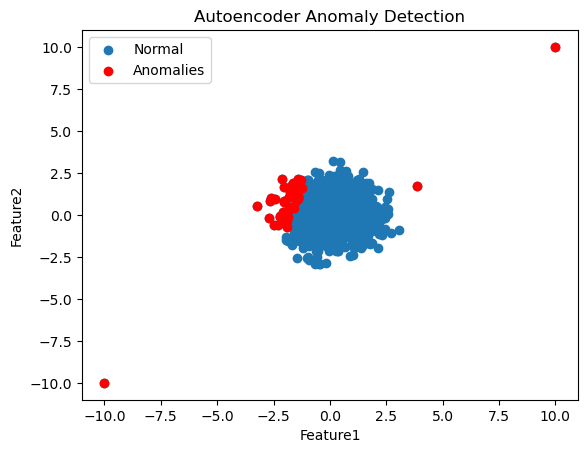

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import StandardScaler


# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


# Set random seed for reproducibility
np.random.seed(42)

# Build the autoencoder model
input_layer = Input(shape=(2,))
encoded = Dense(1, activation='relu')(input_layer)
decoded = Dense(2)(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(scaled_data, scaled_data, epochs=20, batch_size=100, verbose=0)

# Calculate reconstruction errors
reconstructed_data = autoencoder.predict(scaled_data)
reconstruction_errors = np.mean(np.square(scaled_data - reconstructed_data), axis=1)

# Set a reconstruction error threshold for anomaly detection
reconstruction_error_threshold = np.percentile(reconstruction_errors, 95)

# Identify anomalies
anomalies = df[reconstruction_errors > reconstruction_error_threshold]

# Plot the dataset and anomalies
plt.scatter(df['Feature1'], df['Feature2'], label='Normal')
plt.scatter(anomalies['Feature1'], anomalies['Feature2'], color='red', label='Anomalies')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Autoencoder Anomaly Detection')
plt.legend()
plt.show()


# 13- Moving Averages (time series approach)

Moving averages are a simple yet effective technique for anomaly detection in time series data.

In summary, moving averages are a simple and quick method for detecting anomalies in time series data. They are particularly effective for identifying long-term trends and patterns, but they might lag in detecting recent anomalies and might not work well with rapidly changing data or complex patterns. Consider the specific characteristics of your data and the nature of the anomalies you're looking to detect when deciding whether moving averages are an appropriate approach.

**Pros:**

1. **Noise Reduction:** Moving averages smooth out the noise in time series data, making it easier to identify underlying trends and patterns.

2. **Easy Implementation:** The concept of moving averages is straightforward and easy to implement, making it accessible to users with varying levels of technical expertise.

3. **Quick Identification of Trends:** Moving averages help in quickly identifying trends and changes in data over time.

4. **Intuitive Interpretation:** Anomalies are often indicated by data points that deviate significantly from the moving average, providing an intuitive interpretation.

5. **Robust to Short-Term Fluctuations:** Moving averages are less sensitive to short-term fluctuations, making them suitable for detecting long-term anomalies.

6. **Versatility:** Moving averages can be applied to various time series data types, including financial data, sensor readings, and more.

**Cons:**

1. **Lags Behind:** Moving averages introduce a lag in anomaly detection since the moving average values are calculated over a window of data points. This can delay the detection of recent anomalies.

2. **Difficulty with Rapid Changes:** Moving averages might not respond well to rapid changes in data, particularly when the window size is large.

3. **Inaccurate for Complex Patterns:** For time series with complex patterns, moving averages might not effectively capture all variations, leading to false positives or missed anomalies.

4. **Dependent on Window Size:** The choice of the window size impacts the sensitivity of the technique. A smaller window might miss long-term anomalies, while a larger window might miss short-term anomalies.

5. **Not Adaptive:** Moving averages do not adapt well to changes in data patterns. If the data pattern shifts suddenly, the moving average might take some time to adjust.

6. **Limited for Non-Linear Data:** Moving averages assume linearity, which might not be suitable for time series with nonlinear trends.

7. **Baseline Consideration:** Determining the appropriate baseline moving average (e.g., simple, weighted, exponential) can impact the detection of anomalies.

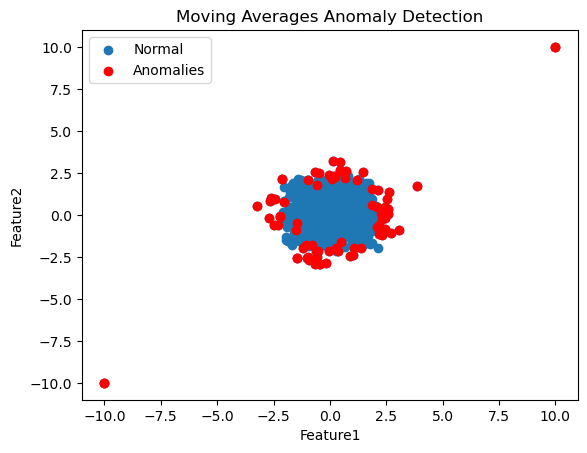

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000)
})

# Add some anomalies, I will add anomalies in the end of the dataset
df.iloc[-1] = [10, 10]
df.iloc[-2] = [-5 -5]


# Calculate moving averages
window_size = 50
moving_averages = df.rolling(window=window_size).mean()

# Calculate the standard deviation of the moving averages
moving_std = df.rolling(window=window_size).std()

# Calculate the z-scores
z_scores = (df - moving_averages) / moving_std

# Define a threshold for anomaly detection (adjust as needed)
threshold = 2

# Identify anomalies
anomalies = np.where(np.abs(z_scores) > threshold)

# Plot the dataset and anomalies
plt.scatter(df['Feature1'], df['Feature2'], label='Normal')
plt.scatter(df.iloc[anomalies[0]]['Feature1'], df.iloc[anomalies[0]]['Feature2'], color='red', label='Anomalies')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Moving Averages Anomaly Detection')
plt.legend()
plt.show()


# 14- Seasonal Decomposition (time series approach)

Seasonal decomposition is a technique used for anomaly detection in time series data by decomposing the data into its underlying components such as trend, seasonality, and residuals.

In summary, seasonal decomposition is a powerful technique for identifying anomalies by breaking down time series data into its components. However, its effectiveness depends on the quality of decomposition and the suitability of the decomposition assumptions for the given data. Careful consideration of the pros and cons is essential when applying this technique to real-world datasets.

**Pros:**

1. **Pattern Separation:** Seasonal decomposition separates the time series data into different components, making it easier to identify anomalies in individual components and in the overall residual.

2. **Effective for Multiple Patterns:** Seasonal decomposition can capture various types of patterns within a time series, including trends, seasonality, and irregular fluctuations.

3. **Interpretability:** The decomposed components (trend, seasonality, residuals) have meaningful interpretations, aiding in understanding the nature of anomalies.

4. **Highlighting Anomalies:** The residual component, which represents the deviations from the trend and seasonality, can effectively highlight anomalies that are not explained by these components.

5. **Flexible:** Seasonal decomposition can work well with different types of time series data, including those with different levels of seasonality and trends.

6. **Signal Enhancement:** By removing seasonality and trend, seasonal decomposition can help in better identifying anomalies and patterns that are masked by these components.

**Cons:**

1. **Limited to Decomposition Quality:** The effectiveness of seasonal decomposition depends on the quality of the decomposition itself. Inaccurate decomposition can lead to false positives or missed anomalies.

2. **Assumption of Components:** Seasonal decomposition assumes that the time series can be represented as the sum of trend, seasonality, and residual components. This assumption might not hold for all types of data.

3. **Parameter Tuning:** Parameters such as the seasonality period need to be carefully chosen based on domain knowledge or trial and error, which can be time-consuming.

4. **Difficulty with Complex Patterns:** Complex anomalies that are not well-captured by the basic components (trend and seasonality) might not be effectively detected.

5. **Inconsistent Performance:** Seasonal decomposition might perform well on some datasets with clear patterns but might not work as effectively on noisy or irregular data.

6. **Lack of Adaptability:** Seasonal decomposition might not adapt well to changes in data patterns or abrupt shifts in the underlying components.

7. **Data Length Requirement:** Some decomposition methods require a minimum data length to accurately estimate the components, limiting their applicability to short time series.

8. **Subjectivity in Anomaly Definition:** Determining what constitutes an anomaly in the residual component can be subjective and might vary depending on the application.

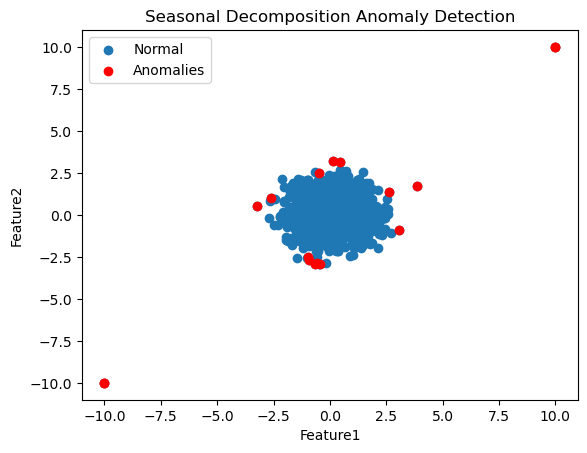

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000)
})

# Add some anomalies, I will add anomalies somewhere in the middle
df.iloc[400] = [10, 10]
df.iloc[401] = [-5 -5]


# Perform seasonal decomposition
def seasonal_decompose_anomaly_detection(data, freq=10):
    decomposed = seasonal_decompose(data, period=freq)
    residual = data - decomposed.seasonal - decomposed.trend
    return residual

# Apply seasonal decomposition to each feature
df_decomposed = df.apply(seasonal_decompose_anomaly_detection, args=(10,))

# Calculate the absolute values of residuals for anomaly detection
df_residuals = df_decomposed.apply(np.abs)

# Define a threshold for anomaly detection
threshold = 2.5  # Adjust this threshold based on your data and requirements

# Identify anomalies
anomalies = np.where(df_residuals > threshold)

# Plot the dataset and anomalies
plt.scatter(df['Feature1'], df['Feature2'], label='Normal')
plt.scatter(df.iloc[anomalies[0]]['Feature1'], df.iloc[anomalies[0]]['Feature2'], color='red', label='Anomalies')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Seasonal Decomposition Anomaly Detection')
plt.legend()
plt.show()


# 15- Exponential Smoothing - (Time Series approach)

Exponential Smoothing is a time series forecasting method that can also be used for anomaly detection, particularly in cases where the anomalies are related to sudden changes in the underlying data patterns. Exponential Smoothing aims to capture the underlying trends and patterns in a time series by giving more weight to recent data points.

Exponential Smoothing can be used for anomaly detection in time series data when the anomalies manifest as sudden deviations from the expected pattern. It's important to understand its limitations and consider the specific characteristics of the data being analyzed.

1. **Basic Exponential Smoothing:**
   - Basic Exponential Smoothing (also known as Single Exponential Smoothing) is used to smooth out the noise and capture the trend in a time series.
   - It involves calculating a weighted average of past observations, with decreasing weights as you move further back in time.

2. **Detecting Anomalies:**
   - Anomalies in time series data can often be observed as sudden deviations from the expected pattern. These deviations can result from various factors such as errors, outliers, or actual anomalies.
   
3. **Residual Calculation:**
   - Calculate the residuals, which are the differences between the observed values and the values predicted by the Exponential Smoothing model.
   - Larger residuals suggest points where the model's prediction significantly deviates from the actual data.

4. **Thresholding:**
   - Set a threshold value above which residuals are considered anomalies.
   - Residuals exceeding this threshold could indicate anomalies or unusual events.

5. **Visualization:**
   - Plot the time series data along with the predicted values from the Exponential Smoothing model and mark the detected anomalies.

**Pros**

1. **Time Context:** Exponential Smoothing considers the temporal context of the data, making it suitable for detecting anomalies that occur as sudden deviations from the historical pattern.

2. **Simplicity:** The method is relatively simple to understand and implement, especially for those familiar with time series forecasting.

3. **Adaptive:** Exponential Smoothing adapts to changing trends over time, making it useful for detecting anomalies in evolving data patterns.

**Cons:**

1. **Limited to Time Series Data:** Exponential Smoothing is designed for time series data and might not be suitable for other types of data.

2. **Parameter Selection:** Choosing the appropriate smoothing parameters (e.g., smoothing factor, seasonality) can be crucial for accurate anomaly detection.

3. **Local Anomalies:** Exponential Smoothing is best suited for detecting local anomalies related to changes in trends or seasonality. It might not be as effective for global anomalies.

4. **Dependence on Data Quality:** Anomalies detected by Exponential Smoothing depend on the quality and consistency of the underlying data.

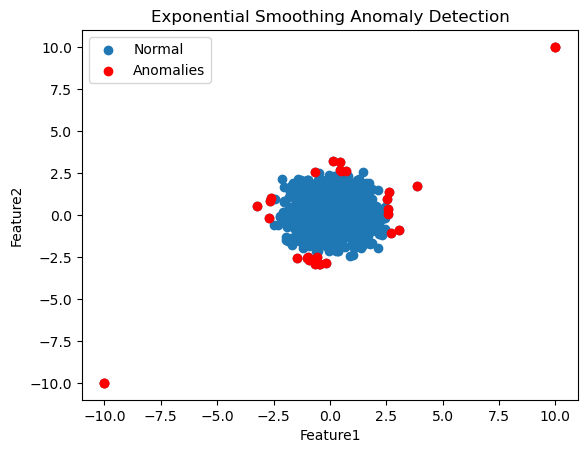

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Exponential Smoothing to each feature
smoothing_params = {'trend': None, 'seasonal': None, 'seasonal_periods': None}
smoothed_data = {}

for column in df.columns:
    model = ExponentialSmoothing(df[column], **smoothing_params)
    fit_model = model.fit()
    smoothed_data[column] = fit_model.fittedvalues

# Calculate residuals (deviations from forecasts)
residuals = df - pd.DataFrame(smoothed_data)

# Set anomaly detection threshold (you can adjust this)
anomaly_threshold = 2.5

# Identify anomalies based on residuals
anomalies = np.where(abs(residuals) > anomaly_threshold)


# Plot the dataset and anomalies
plt.scatter(df['Feature1'], df['Feature2'], label='Normal')
plt.scatter(df.iloc[anomalies[0]]['Feature1'], df.iloc[anomalies[0]]['Feature2'], color='red', label='Anomalies')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Exponential Smoothing Anomaly Detection')
plt.legend()
plt.show()

# 16- Histogram-Based Outlier Score (HBOS)

![HBOS](https://media.licdn.com/dms/image/D4E12AQFd68p2QhIJRw/article-cover_image-shrink_600_2000/0/1674265084222?e=2147483647&v=beta&t=sbLpj8DcJpi9b-H-QLQPoUlwexdPQoVJ8ZnnwxC0snE)

#### HBOS Info and poster
https://www.dfki.de/fileadmin/user_upload/import/6431_HBOS-poster.pdf

The Histogram-Based Outlier Score (HBOS) is an unsupervised anomaly detection algorithm that uses histograms to approximate the probability density of data points. It assumes that normal data points occur in high-density regions and anomalies occur in low-density regions. HBOS computes an "outlier score" for each data point, which quantifies how different its density is compared to the expected density of normal data.

HBOS is a method that estimates the outlier score of data points based on their deviations from the expected distribution of the data. It constructs histograms of feature values and calculates the outlier score as the inverse of the sum of bin heights where a data point falls. This score reflects how different a data point's feature values are from the typical distribution, making it a measure of anomaly.

HBOS is a quick and efficient anomaly detection method that is particularly useful for high-dimensional datasets. It's easy to implement and provides interpretable results. However, its sensitivity to parameters and assumptions about feature independence should be considered when applying it to real-world data. It can be a good starting point for exploratory analysis or as a baseline method, but its effectiveness might vary depending on the characteristics of the data and the nature of anomalies.

**Pros:**

1. **Simplicity:** HBOS is easy to understand and implement. It doesn't involve complex mathematical operations or parameters.

2. **Efficiency:** It's computationally efficient, making it suitable for large datasets and high-dimensional data where other methods might struggle.

3. **Scalability:** HBOS performs well in high-dimensional spaces, making it appropriate for applications with a large number of features.

4. **Interpretability:** The outlier score directly reflects the degree of anomaly. Higher scores indicate a higher likelihood of being an outlier.

5. **Unsupervised:** HBOS doesn't require labeled data for training. It leverages the distribution of the data itself to detect anomalies.

6. **Handles Different Scales:** HBOS handles features with varying scales well since it builds histograms independently for each feature.

**Cons:**

1. **Sensitivity to Parameters:** While HBOS is relatively simple, its performance can be sensitive to the choice of parameters, like the number of bins for the histograms.

2. **Assumes Independence:** HBOS assumes independence of features, which might not hold in all cases. Correlated features might affect the accuracy of anomaly detection.

3. **Limited to Numeric Data:** HBOS works best with numeric data. It might not be suitable for categorical or mixed-type data without preprocessing.

4. **Limited for Complex Patterns:** HBOS might struggle with detecting complex anomalies that are not well-captured by simple histograms.

5. **No Contextual Information:** HBOS doesn't consider the relationships between data points. Some anomalies might be missed if they don't show up as outliers in the histogram.

6. **No Adaptive Learning:** HBOS doesn't adapt well to changes in the data distribution over time. It might require re-calibration if the data dynamics change.

7. **Sensitive to Binning:** The accuracy of HBOS can be influenced by the choice of binning strategy. Selecting inappropriate bin sizes might lead to false positives or negatives.

In [17]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
  Created wheel for pyod: filename=pyod-1.1.0-py3-none-any.whl size=185348 sha256=5a0e4f7048d88ca2f07ec26b222113f1651c16babf7b258e02fdd442af56a7f6
  Stored in directory: /root/.cache/pip/wheels/36/8e/e2/e932956b10b843eb6be9eefa70b5c1bee7b561be14c423b136
Successfully built pyod


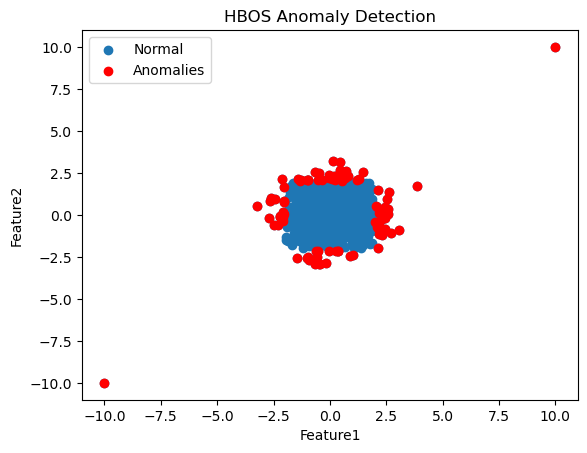

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.hbos import HBOS


# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000)
})

# Add some anomalies, I will add anomalies somewhere in the middle
df.iloc[0] = [10, 10]
df.iloc[1] = [-5 -5]

# Create HBOS model
hbos = HBOS(contamination=0.1)  # Set the expected proportion of outliers

# Fit the model
hbos.fit(df)

# Predict outlier scores
outlier_scores = hbos.decision_function(df)

# Identify anomalies
threshold = np.percentile(outlier_scores, 100 * (1 - 0.1))
anomalies = df[outlier_scores > threshold]

# Plot the dataset and anomalies
plt.scatter(df['Feature1'], df['Feature2'], label='Normal')
plt.scatter(anomalies['Feature1'], anomalies['Feature2'], color='red', label='Anomalies')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('HBOS Anomaly Detection')
plt.legend()
plt.show()


# 17- PCA

PCA (Principal Component Analysis) can be used for anomaly detection, but its effectiveness depends on the nature of the data and the types of anomalies you are trying to detect. Here are some factors to consider when using PCA for anomaly detection:

**Pros of Using PCA for Anomaly Detection:**

1. **Dimensionality Reduction:** PCA can help in reducing the dimensionality of the data while retaining most of the variance. This can be useful for simplifying complex data and highlighting important features.

2. **Noise Reduction:** PCA can help in reducing the impact of noise in the data by focusing on the principal components that capture the most significant variations.

3. **Visual Inspection:** When reducing data to two or three dimensions (principal components), you can visualize the data and anomalies in a scatter plot, which might provide insights.

**Cons of Using PCA for Anomaly Detection:**

1. **Linear Transformation:** PCA is a linear transformation technique. If anomalies don't exhibit linear relationships with the principal components, PCA might not effectively distinguish them.

2. **Global Anomalies:** PCA might not be suitable for detecting global anomalies that are far from the normal data's centroid. It tends to focus on capturing variations within the majority of the data.

3. **Distribution Assumptions:** PCA assumes that the data follows a Gaussian distribution. Anomalies can distort the distribution and impact the quality of PCA.

4. **Threshold Selection:** Defining a threshold for detecting anomalies based on the residual errors (distance between original and reconstructed data) can be subjective and challenging.

5. **High Dimensionality Requirement:** PCA tends to be more effective in high-dimensional data. When you only have a few features, other methods might work better.

**When is PCA Effective for Anomaly Detection:**

PCA is more effective for local anomalies that exhibit linear relationships with the principal components of the data. It can be useful when anomalies are small deviations from the normal data's distribution and are related to the underlying structure captured by PCA. It's often used as a preprocessing step for anomaly detection when dealing with high-dimensional data.

For certain types of anomalies, such as those with non-linear relationships or when the anomalies are significantly different from the normal data, other techniques like isolation forests, one-class SVMs, or autoencoders might be more suitable.

In summary, while PCA can be used for anomaly detection, it's important to consider the characteristics of your data and the types of anomalies you are trying to detect. PCA might work well in some cases but might not be the best choice for all anomaly detection scenarios.

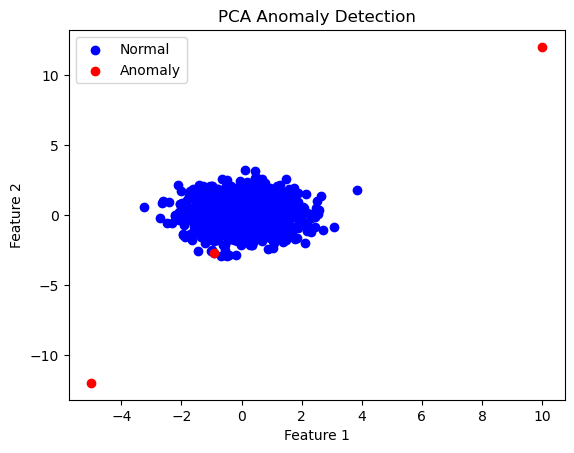

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Sample dataset
np.random.seed(42)
df = pd.DataFrame({
    'Feature1': np.random.normal(0, 1, 1000),
    'Feature2': np.random.normal(0, 1, 1000),
    'Feature3': np.random.normal(0, 1, 1000),
    'Feature4': np.random.normal(0, 1, 1000)
    
})

# Add some anomalies
df.loc[0] = [10, 12, 20, 13]
df.loc[1] = [-5, -12, -15, -55]


# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


# Reconstruct the data using the principal components
X_reconstructed = pca.inverse_transform(X_pca)

# Calculate the residuals
residuals = np.sum(np.square(X_scaled - X_reconstructed), axis=1)

# Define a threshold for anomalies
threshold = 7  # Adjust this value based on your data and desired sensitivity
anomalies = np.where(residuals > threshold)[0]

# Plot the original data points
plt.scatter(df['Feature1'][2:], df['Feature2'][2:], label='Normal', color='blue')
plt.scatter(df.loc[anomalies]['Feature1'], df.loc[anomalies]['Feature2'], label='Anomaly', color='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('PCA Anomaly Detection')
plt.legend()
plt.show()

# In Conclusion

<font size="+1" color='#3366ff'><b> I hope you enjoyed this kernel, Please don't forget to appreciate me with an Upvote and leave a comment for suggestions.</b></font>

<img src="https://media1.giphy.com/media/BYoRqTmcgzHcL9TCy1/giphy.gif?cid=ecf05e478p9j7np51otmjrx2mb5m0pkpz030jucp79d2ji84&ep=v1_gifs_search&rid=giphy.gif&ct=g" alt="Thank You Gif Professional, HD Png Download@kindpng.com">